In [1]:
from os.path import join

import cv2
import matplotlib.pyplot as plt

import torch

from dataloader import get_noisy_image, transformations
from model import AutoEncoder, Unet, build_model

from skimage.metrics import peak_signal_noise_ratio as PSNR

In [2]:
# model = Unet(in_channels=3, out_channels=3, depth=3)
model_type = "denoising"
# model = build_model(model_type=model_type)

In [3]:
from transformers import SwinForMaskedImageModeling
model = SwinForMaskedImageModeling.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinForMaskedImageModeling: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinForMaskedImageModeling from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinForMaskedImageModeling from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SwinForMaskedImageModeling were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized: ['decoder.0.bias', 'swin.embeddings.mask_token', 'decoder.0.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infer

In [4]:
path = "results/"

In [5]:
model

SwinForMaskedImageModeling(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0): SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
        

In [6]:
model_path = join(path, "swin/")
model.load_state_dict(torch.load(join(model_path, f"model_rgb.pth")))
model.eval()

SwinForMaskedImageModeling(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0): SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
        

In [7]:
dataset_path = "/Users/irina/Documents/Etudes/DS/datasets/GAN/monet_style_dataset/All/"
test_path = join(dataset_path, "train/")

transform = transformations()

image = cv2.imread(join(test_path, "images/image1.png"))
image= transform(image).unsqueeze(0)
image = image
noisy_image = get_noisy_image(image)
preds = model(noisy_image).logits
target = torch.clone(image)

In [8]:
def imshow(pred, target, noisy_img, ax=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots(1, 3, figsize=(20,20))
    pred = pred.numpy().transpose((1, 2, 0))
    noisy_img = noisy_img.numpy().transpose((1, 2, 0))
    target = target.numpy().transpose((1, 2, 0))

    psnr_noisy = PSNR(target, noisy_img)
    psnr_pred = PSNR(target, pred)

    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)
    target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

    ax[0].imshow(target)
    ax[0].set_title("Original image")
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].tick_params(axis='both', length=0)
    ax[0].set_xticklabels('')
    ax[0].set_yticklabels('')

    ax[1].imshow(noisy_img)
    ax[1].set_title("Noisy image")
    ax[1].set_xlabel(f'PSNR : {psnr_noisy:.02f}')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].tick_params(axis='both', length=0)
    ax[1].set_xticklabels('')
    ax[1].set_yticklabels('')

    ax[2].imshow(pred)
    ax[2].set_title("Predicted image")
    ax[2].set_xlabel(f'PSNR : {psnr_pred:.02f}')
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)
    ax[2].spines['left'].set_visible(False)
    ax[2].spines['bottom'].set_visible(False)
    ax[2].tick_params(axis='both', length=0)
    ax[2].set_xticklabels('')
    ax[2].set_yticklabels('')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


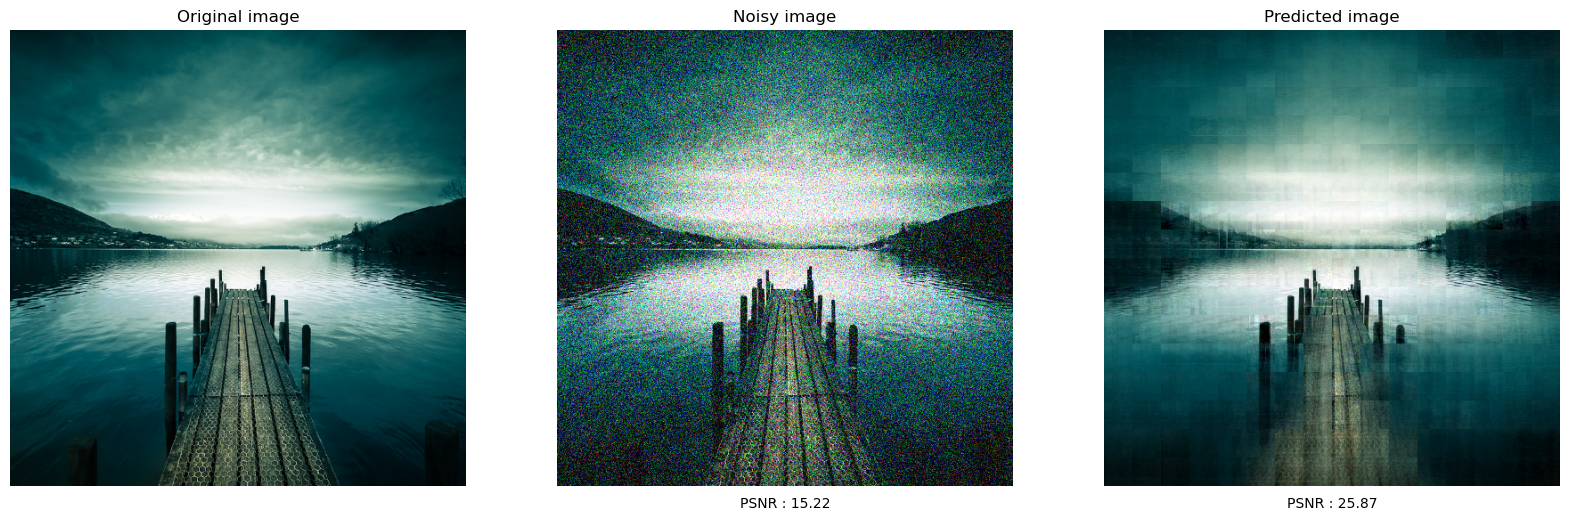

In [9]:
imshow(preds[0].detach(), target[0].detach(), noisy_image[0].detach())